## Exercises
### Do your work for this exercise in a jupyter notebook named modeling within the regression-exercises repo. Add, commit, and push your work.

### 1. Select a dataset with a continuous target variable.

### 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

### 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [1]:
#wrangle
import wrangle

#std imports
import pandas as pd 
import numpy as np
from scipy import stats
from math import sqrt

# visualize the data
import seaborn as sns
import matplotlib.pyplot as plt 

#sklearn
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy import stats
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# from linear_model: LinearRegression (OLS), LassoLars, TweedieRegressor (Generalized Linear Model)
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor


import warnings
warnings.filterwarnings('ignore')


In [2]:
#acquire data
df = wrangle.wrangle_zillow()
df

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
7,3,2.0,2077,646760,1926,7924.68,6037
18,3,1.0,1244,169471,1950,2532.88,6037
19,3,2.0,1300,233266,1950,3110.99,6037
20,3,2.0,1222,290492,1951,3870.25,6037
40,2,1.0,725,37548,1953,576.47,6037
...,...,...,...,...,...,...,...
2152815,4,2.0,1484,71859,1955,1135.72,6037
2152824,2,1.0,710,175319,1940,2040.78,6111
2152831,3,2.0,1194,271536,1954,3555.73,6037
2152852,3,2.0,1917,408680,1946,4341.32,6111


In [3]:
#get shape
df.shape

(1827497, 7)

In [4]:
#split data
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.25, random_state=123)
train.shape, validate.shape, test.shape

((1096497, 7), (365500, 7), (365500, 7))

In [5]:
train.head(5)

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
511824,3,2.0,1845,497915,1952,5967.44,6037
986893,3,2.0,1524,320818,1955,4068.13,6037
1462975,2,2.0,1651,608536,1984,6639.32,6059
1152928,3,1.0,1112,372790,1953,4586.50,6037
816888,3,2.0,1424,340818,1975,4071.32,6059


In [6]:
# get my x & y train into df
X_train = pd.DataFrame(train.area)
y_train = pd.DataFrame(train.tax_value)

In [7]:
y_train

,tax_value
511824,497915
986893,320818
1462975,608536
1152928,372790
816888,340818
...,...
1055694,282434
488948,412986
1828724,456392
1189611,353677


In [8]:
x_validate = pd.DataFrame(validate.area)
y_validate = pd.DataFrame(validate.tax_value)

In [9]:
y_validate

,tax_value
1322861,800000
705788,46867
548133,138342
1496986,86884
99627,362435
...,...
2008772,294404
1560344,520452
1211109,269756
1696704,61668


In [10]:
x_validate

,area
1322861,2335
705788,916
548133,969
1496986,1958
99627,1456
...,...
2008772,968
1560344,2607
1211109,1026
1696704,1132


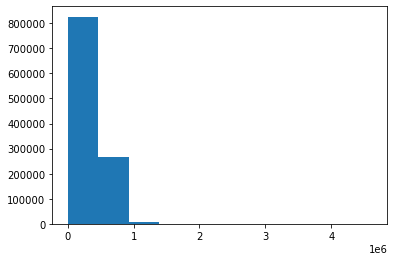

In [11]:
#determine distribution
plt.hist(y_train)
#plt.title(tax_value)
plt.show()

### Modeling
#### Baseline

In [12]:
#calculate mean
baseline = df.tax_value.mean()
baseline

334280.3382785307

In [13]:
#Create mean baseline model
y_train['baseline_mean_pred'] = y_train['tax_value'].mean()
y_validate['baseline_mean_pred'] = y_validate['tax_value'].mean()

#Create median baseline model
y_train['baseline_median_pred'] = y_train['tax_value'].median()
y_validate['baseline_median_pred'] = y_validate['tax_value'].median()

In [14]:
y_train.mean()

tax_value               334464.971072
baseline_mean_pred      334464.971070
baseline_median_pred    300304.000000
dtype: float64

In [15]:
type(y_train)

pandas.core.frame.DataFrame

In [16]:
y_train.tax_value.mean()

334464.97107151226

In [17]:
# 1. Predict tax_value_pred_mean
tax_value_pred_mean = y_train.tax_value.mean()
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_validate['tax_value_pred_mean'] = tax_value_pred_mean

# 2. compute tax_value_pred_median
tax_value_pred_median = y_train.tax_value.median()
y_train['tax_value_pred_median'] = tax_value_pred_median
y_validate['tax_value_pred_median'] = tax_value_pred_median

In [18]:
#check predicted mean & median
y_train

,tax_value,baseline_mean_pred,baseline_median_pred,tax_value_pred_mean,tax_value_pred_median
511824,497915,334464.971072,300304.0,334464.971072,300304.0
986893,320818,334464.971072,300304.0,334464.971072,300304.0
1462975,608536,334464.971072,300304.0,334464.971072,300304.0
1152928,372790,334464.971072,300304.0,334464.971072,300304.0
816888,340818,334464.971072,300304.0,334464.971072,300304.0
...,...,...,...,...,...
1055694,282434,334464.971072,300304.0,334464.971072,300304.0
488948,412986,334464.971072,300304.0,334464.971072,300304.0
1828724,456392,334464.971072,300304.0,334464.971072,300304.0
1189611,353677,334464.971072,300304.0,334464.971072,300304.0


In [19]:
# 3. RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean) ** 0.5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean) ** 0.5

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  205967.3 
Validate/Out-of-Sample:  205757.44


In [20]:
# 4. RMSE of tax_value_pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  208780.98 
Validate/Out-of-Sample:  208468.92


In [21]:
from sklearn.metrics import explained_variance_score

In [22]:
y_train.head()

,tax_value,baseline_mean_pred,baseline_median_pred,tax_value_pred_mean,tax_value_pred_median
511824,497915,334464.971072,300304.0,334464.971072,300304.0
986893,320818,334464.971072,300304.0,334464.971072,300304.0
1462975,608536,334464.971072,300304.0,334464.971072,300304.0
1152928,372790,334464.971072,300304.0,334464.971072,300304.0
816888,340818,334464.971072,300304.0,334464.971072,300304.0


In [23]:
metric_df = pd.DataFrame(
data=[{
    'model': 'mean_baseline',
    'rmse_validate': rmse_validate, 
    'r^2_validate':explained_variance_score(y_validate.tax_value,
                                           y_validate.tax_value_pred_mean)
}])

In [24]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,208468.915345,-2.220446e-16


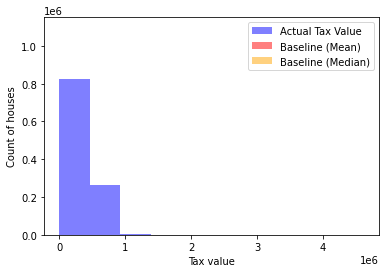

In [25]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.tax_value, color='blue', alpha=0.5, label='Actual Tax Value')
plt.hist(y_train.tax_value_pred_mean, bins=10, color='red', alpha=0.5, label='Baseline (Mean)')
plt.hist(y_train.tax_value_pred_median, bins=10, color='orange', alpha=0.5, label='Baseline (Median)')
plt.xlabel('Tax value')
plt.ylabel('Count of houses')
plt.legend()
plt.show()

In [26]:
y_train.head()

,tax_value,baseline_mean_pred,baseline_median_pred,tax_value_pred_mean,tax_value_pred_median
511824,497915,334464.971072,300304.0,334464.971072,300304.0
986893,320818,334464.971072,300304.0,334464.971072,300304.0
1462975,608536,334464.971072,300304.0,334464.971072,300304.0
1152928,372790,334464.971072,300304.0,334464.971072,300304.0
816888,340818,334464.971072,300304.0,334464.971072,300304.0


### Linear Regression (OLS)

In [28]:
# create the model object
# 
# make the thing
# 

lm = LinearRegression()

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit the thing
# 
lm.fit(X_train, y_train.tax_value)

# predict train
# 
# use the thing!
# 
y_train['tax_value_pred_lm'] = lm.predict(X_train)
y_validate['tax_value_pred_lm'] = lm.predict(x_validate)

# evaluate: rmse
# predict validate
rmse_train = mean_squared_error(y_train.tax_value,
                               y_train.tax_value_pred_lm) ** 0.5
rmse_validate = mean_squared_error(y_validate.tax_value,
                               y_validate.tax_value_pred_lm) ** 0.5
# evaluate: rmse

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  185732.59512752213 
Validation/Out-of-Sample:  185406.50171287113


In [30]:
metric_df = metric_df.append(
{
    'model': 'OLS lm 1',
    'rmse_validate': rmse_validate, 
    'r^2_validate':explained_variance_score(y_validate.tax_value,
                                           y_validate.tax_value_pred_lm)
}, ignore_index=True)


In [31]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,208468.915345,-2.220446e-16
1,OLS lm 1,185410.910961,1.880357e-01


### LassoLars

In [33]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!

lars.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train)
y_validate['tax_value_pred_lars'] = lars.predict(x_validate)

# evaluate: rmse
# predict validate
# evaluate: rmse

rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars) ** 0.5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars) ** 0.5


print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  185735.5469203567 
Validation/Out-of-Sample:  185410.91096107688


In [34]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,208468.915345,-2.220446e-16
1,OLS lm 1,185410.910961,1.880357e-01


In [35]:
metric_df = metric_df.append(
{
    'model': 'LassoLars alpha 1',
    'rmse_validate': rmse_validate, 
    'r^2_validate':explained_variance_score(y_validate.tax_value,
                                           y_validate.tax_value_pred_lars)
}, ignore_index=True)

In [36]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,208468.915345,-2.220446e-16
1,OLS lm 1,185410.910961,1.880357e-01
2,LassoLars alpha 1,185410.910961,1.879970e-01


### TweedieRegressor (GLM)


In [41]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!

glm.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_glm'] = glm.predict(X_train)
y_validate['tax_value_pred_glm'] = glm.predict(x_validate)

# evaluate: rmse
# predict validate
# evaluate: rmse

rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm) ** 0.5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm) ** 0.5


print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  205967.29686084748 
Validation/Out-of-Sample:  205757.43562096954


In [42]:
metric_df = metric_df.append(
    {
    'model': 'GLM Model power 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_glm)}, ignore_index=True)

In [43]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,208468.915345,-2.220446e-16
1,OLS lm 1,185410.910961,1.880357e-01
2,LassoLars alpha 1,185410.910961,1.879970e-01
3,GLM Model power 1,205757.435621,0.000000e+00


## Polynomial Regression

### PolynomialFeatures

In [56]:
# get my x & y train into df
X_test = pd.DataFrame(test.area)
y_test = pd.DataFrame(test.tax_value)

In [57]:
# make the polynomial features to get a new set of features

pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(x_validate)
X_test_degree2 = pf.transform(X_test)

### Linear Regression

In [58]:
# create the model object
# make the thing

lm2 = LinearRegression(normalize=True)

# 
# fit the thing

lm2.fit(X_train_degree2, y_train.tax_value)

LinearRegression(normalize=True)

In [59]:
# predict train
# 
# use the thing!
# 

# evaluate: rmse
# predict validate
y_train['tax_value_pred_lm2'] = lm2.predict(X_train_degree2)
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2) ** 0.5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2) ** 0.5

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  185691.28894341984 
Validation/Out-of-Sample:  185357.33478618597


In [60]:
metric_df = metric_df.append(
    {
    'model': 'Quadratic Model',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_lm2)}, ignore_index=True)


In [61]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,208468.915345,-2.220446e-16
1,OLS lm 1,185410.910961,1.880357e-01
2,LassoLars alpha 1,185410.910961,1.879970e-01
3,GLM Model power 1,205757.435621,0.000000e+00
4,Quadratic Model,185357.334786,1.884660e-01


In [ ]:
# takeaways:
# LassoLars seems to be the best model alomost tying up with OLS 


### Evaluate
### Plotting Actual vs. Predicted Values

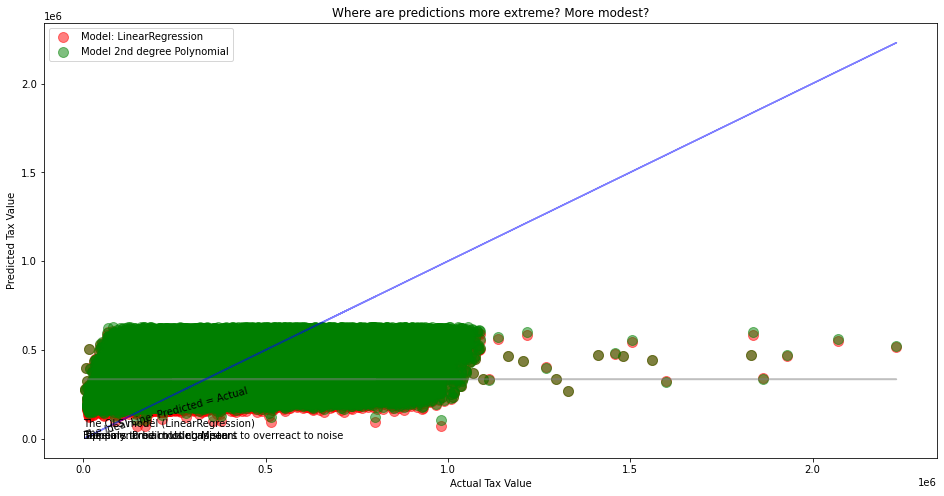

In [62]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.tax_value_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
# plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_glm, 
#             alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Where are predictions more extreme? More modest?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

### Residual Plots: Plotting the Errors in Predictions

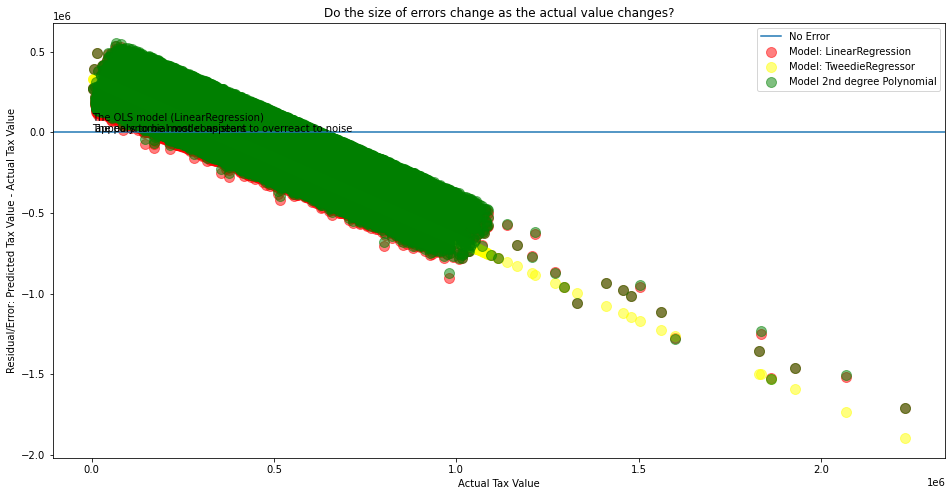

In [63]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm - y_validate.tax_value, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_glm - y_validate.tax_value, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm2 - y_validate.tax_value, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Residual/Error: Predicted Tax Value - Actual Tax Value")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

### Histogram

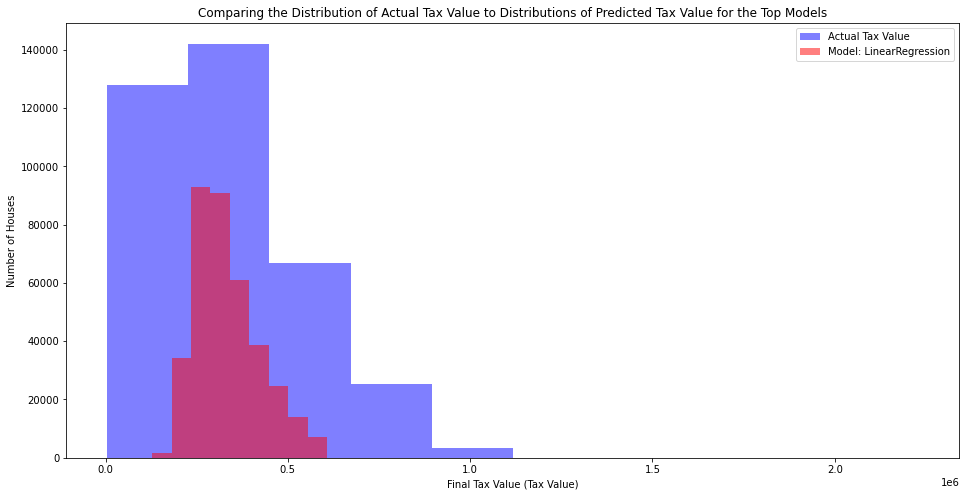

In [64]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.tax_value, color='blue', alpha=.5, label="Actual Tax Value")
plt.hist(y_validate.tax_value_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
# plt.hist(y_validate.Tax value_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
# plt.hist(y_validate.Tax value_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Final Tax Value (Tax Value)")
plt.ylabel("Number of Houses")
plt.title("Comparing the Distribution of Actual Tax Value to Distributions of Predicted Tax Value for the Top Models")
plt.legend()
plt.show()

In [65]:
# final steps before putting into production:
# select best model:
# assess on test set


In [66]:
# LassoLars was my best model, so I will utilize this to evaluate results on my test set


In [67]:
# capture predictions on test
y_pred_test = lm.predict(X_test)


In [68]:
# get error metrics:
rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5

In [69]:
rmse_test

185704.79629170237